# Détection de nouveauté

TP réaliser par :
 - **MARC**  **Angéline**
 - **HUGUENEL** **Thomas**

In [2]:
import numpy as np
np.set_printoptions(threshold=10000, suppress=True)
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from utilsfunction import *

In [3]:
credit_card = pd.read_csv('creditcard.csv')
credit_card_features, credit_card_labels = preprocess_data(credit_card)

credit_card_features = pd.DataFrame(credit_card_features)

## Séparation des données

In [4]:
data = credit_card_features.copy()
data['Class'] = credit_card_labels

# Séparer normales et outliers
normals = data[data['Class'] == 0]
outliers = data[data['Class'] == 1]

# Échantillonnage des normales
normals_train = normals.sample(frac=0.9, random_state=42)  # 90% des normales
normals_test = normals.drop(normals_train.index)           # Les 10% restants

# Combiner pour créer l'ensemble mixte
test_mixed = pd.concat([normals_test, outliers])

In [22]:
print("Taille de l'ensemble de test final: ", test_mixed.shape)
print("Taille de l'ensemble de train: ", normals_train.shape)

Taille de l'ensemble de test final:  (28923, 30)
Taille de l'ensemble de train:  (255884, 30)


## Création des données d'entrainement et de test

In [5]:
X_train = normals_train.drop(columns=['Class'])
y_train = normals_train['Class']

X_test = test_mixed.drop(columns=['Class'])
y_test = test_mixed['Class']

## Isolation forest

In [8]:
iso_forest = IsolationForest(n_estimators=100, max_samples=256, contamination=0.01, random_state=42)
iso_forest.fit(X_train)

y_pred = iso_forest.predict(X_test)
iso_scores = -iso_forest.decision_function(X_test)


## Local Outlier Factor

In [15]:
lof = LocalOutlierFactor(n_neighbors=20, novelty=True)
lof.fit(X_train)
lof_scores = -lof.decision_function(X_test)  # Score d'anomalie
lof_preds = lof.predict(X_test) 

# Comparaison des méthodes

In [31]:
y_test_preds = np.where(lof_preds == 0, 0, 1)

evaluate_model(y_test, iso_scores, y_test_preds, "Isolation Forest")
print("\n")
evaluate_model(y_test, lof_scores, y_test_preds, "Local Outlier Factor")

--- Isolation Forest ---
ROC AUC: 0.9458
PR AUC: 0.5005
F1 Score: 0.0335

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     28431
           1       0.02      1.00      0.03       492

    accuracy                           0.02     28923
   macro avg       0.01      0.50      0.02     28923
weighted avg       0.00      0.02      0.00     28923



--- Local Outlier Factor ---
ROC AUC: 0.6314
PR AUC: 0.0341
F1 Score: 0.0335

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     28431
           1       0.02      1.00      0.03       492

    accuracy                           0.02     28923
   macro avg       0.01      0.50      0.02     28923
weighted avg       0.00      0.02      0.00     28923



c:\Users\runhi\miniconda3\envs\TAA\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\runhi\miniconda3\envs\TAA\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\runhi\miniconda3\envs\TAA\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\r

ROC AUC (Isolation Forest): 0.9458
PR AUC (Isolation Forest): 0.5005


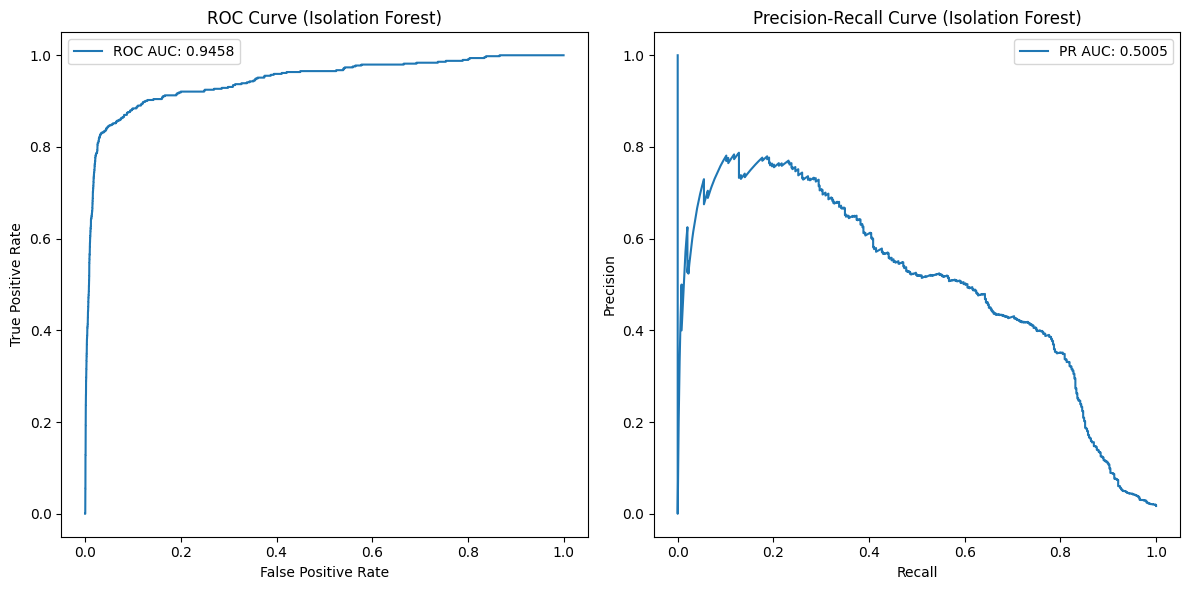

ROC AUC (Local Outlier Factor): 0.6314
PR AUC (Local Outlier Factor): 0.0341


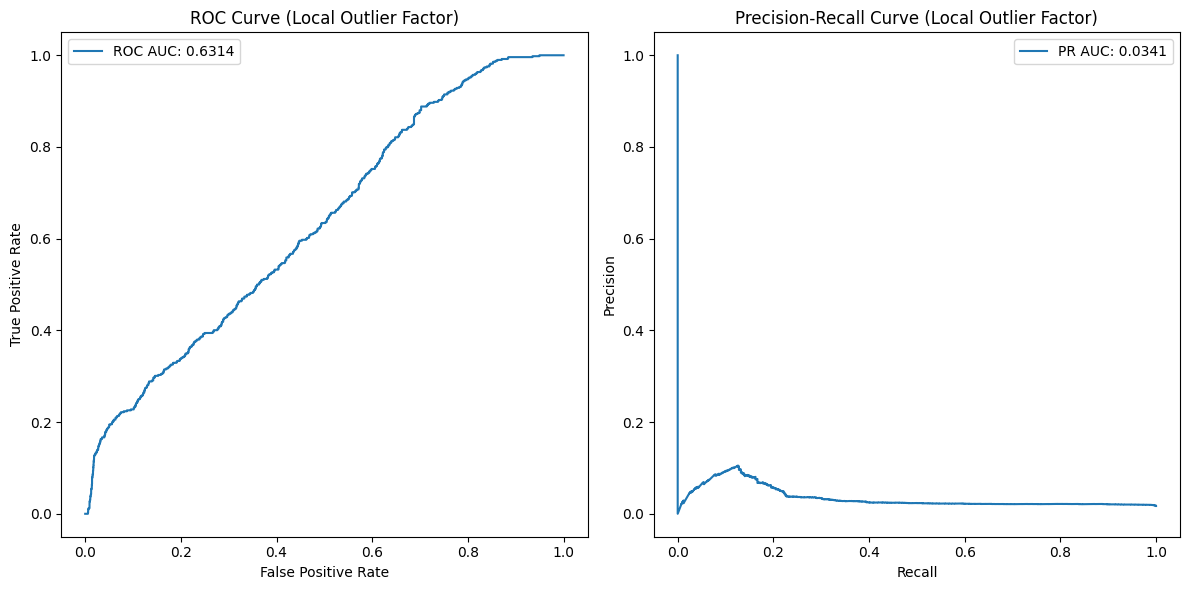

In [26]:
plot_roc_pr_curves((y_test, iso_scores), "Isolation Forest")
plot_roc_pr_curves((y_test, lof_scores), "Local Outlier Factor")

Nous pouvons voir que l'Isolation forest est plus preformant que la Local Outlier Factor. Nous obtenons un score plus élevé en ROC AUC (0.94 cpntre 0.63) et en précision-recall (0.50 contre 0.03). Cependant, le score F1 est exactement le même pour les deux méthode (0.0335).